<a href="https://colab.research.google.com/github/nilkanth02/pytorch-learnings/blob/main/Iris_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

In [86]:
# create the model class that inherits the nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower)--> Hidden layer1(no. of neurons) -> h2(n)-> output
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [87]:
# Pick a manual seed for randomization
torch.manual_seed(45)
# Create an instance of model
model = Model()

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [89]:
url ='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df= pd.read_csv(url)

In [90]:
my_df.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [91]:
# changing last column from char to num
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [92]:
# train test split set x, y
X = my_df.drop('variety', axis =1)
y = my_df['variety']


In [93]:
#  Coverting these to numpy arrays
X = X.values
y = y.values

In [94]:
from sklearn.model_selection import train_test_split


In [95]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [96]:
# convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [97]:
# set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# choosing the Adam optimizer also, lr = learning rate (if the error dosen't go down after bunch of iterations(epochs) we lower the learning rate   )
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [98]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [99]:
# time to train our model
# epoch -> pass one time
epochs = 200
losses =[]
for i in range(epochs):

  # go forward and get a prediction
  y_pred = model.forward(X_train)
  # Get the predicted results

  # measure the loss
  loss = criterion(y_pred, y_train)  # predicted value vs y_train

  # keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i% 10 ==0:
    print(f'Epoch {i} and loss {loss}')


  # Do some backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  optimizer.step()

Epoch 0 and loss 1.1793591976165771
Epoch 10 and loss 1.026084303855896
Epoch 20 and loss 0.8200382590293884
Epoch 30 and loss 0.5896385312080383
Epoch 40 and loss 0.4497186243534088
Epoch 50 and loss 0.3571263253688812
Epoch 60 and loss 0.2574498653411865
Epoch 70 and loss 0.21075795590877533
Epoch 80 and loss 0.19194762408733368
Epoch 90 and loss 0.19171568751335144
Epoch 100 and loss 0.16724397242069244
Epoch 110 and loss 0.1126089096069336
Epoch 120 and loss 0.10949636250734329
Epoch 130 and loss 0.1148565337061882
Epoch 140 and loss 0.09883943200111389
Epoch 150 and loss 0.09264650195837021
Epoch 160 and loss 0.0790063813328743
Epoch 170 and loss 0.08403339982032776
Epoch 180 and loss 0.07381271570920944
Epoch 190 and loss 0.08176586031913757


Text(0.5, 0, 'Epochs')

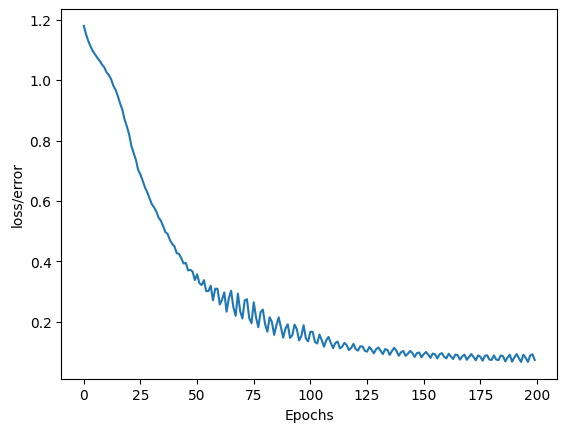

In [100]:
# graph it out
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epochs')

In [101]:
# evaluate the Model on test datasets(validate model on test set)
with torch.no_grad(): # Basically turning off the backpropagation
  y_eval = model.forward(X_test) # X_test are features from our test sets, y_eval will be our predicitons
  loss = criterion(y_eval, y_test) # Finding the loss or error


In [102]:
loss

tensor(0.1484)

In [103]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x="Setosa"
    elif y_test[i] == 1:
      x="Versicolor"
    else:
      x="Virginica"

    # will tell us what type of flower class our network thinks it is
    print(f'{i+1}) {str(y_val)} \t {x} \t {y_test[i]} \t {y_val.argmax().item()}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'Accuracy: {correct}/{len(X_test)}')

1) tensor([  8.0605,   0.5660, -13.6119]) 	 Setosa 	 0 	 0
2) tensor([  7.3012,   0.8834, -12.7919]) 	 Setosa 	 0 	 0
3) tensor([-2.0025,  1.3241,  0.3706]) 	 Virginica 	 2 	 1
4) tensor([  7.1237,   0.5010, -12.1879]) 	 Setosa 	 0 	 0
5) tensor([  7.3610,   0.5175, -12.5486]) 	 Setosa 	 0 	 0
6) tensor([  7.8663,   0.7947, -13.5355]) 	 Setosa 	 0 	 0
7) tensor([  6.9262,   0.4873, -11.8876]) 	 Setosa 	 0 	 0
8) tensor([-2.0680, -0.7171,  2.3091]) 	 Virginica 	 2 	 2
9) tensor([-2.0274,  0.5462,  1.1093]) 	 Virginica 	 2 	 2
10) tensor([-2.0680, -0.7171,  2.3091]) 	 Virginica 	 2 	 2
11) tensor([  8.0149,   0.5628, -13.5426]) 	 Setosa 	 0 	 0
12) tensor([-2.0409,  0.1257,  1.5087]) 	 Virginica 	 2 	 2
13) tensor([-2.0680, -0.7171,  2.3091]) 	 Virginica 	 2 	 2
14) tensor([-2.0680, -0.7171,  2.3091]) 	 Virginica 	 2 	 2
15) tensor([-1.9918,  1.6583,  0.0532]) 	 Virginica 	 2 	 1
16) tensor([  7.6927,   0.5405, -13.0529]) 	 Setosa 	 0 	 0
17) tensor([-2.0680, -0.7171,  2.3091]) 	 Virgini